In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import argparse
import ast
import sys
import gzip
import csv
import pprint
import pandas as pd
import neet.sensitivity as ns
import neet.boolean as nn
from neet.boolean.examples import c_elegans
from itertools import groupby
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import stats
import scipy as sp
import community
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from matplotlib import patches

from network_ei import *
from causal_emergence import *
from get_motifs import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
plt.rc('axes', axisbelow=True)
%matplotlib inline

/Users/brennan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
def new_Win(G, intervention_distribution=[], p0=0.0):
    """
    Return a Win vector corresponding to the intervention into that system
    
    Params
    ------
    G (nx.Graph): a graph
    intervention_distribution (np.ndarray): a vector with weights corresponding to 
                the intervention of random walkers into the system. if unspecified, 
                this is assumed to be a maximum entropy vector
    p0 (float): small probability, defaulting to 0.0
    
    Returns
    -------
    Win (np.ndarray): a vector of length N corresponding to the percentage of random walkers
                      on each node, following an intervention distribution
    """
    
    W_out = get_Wout_full(G, p0)
    
    
    
    return Win

In [ ]:
    W_out = get_Wout(G, p0)
    if sum(W_out.sum(axis=0))!=0.0:
        return W_out.sum(axis=0)/sum(W_out.sum(axis=0))
    else:
        return np.zeros(len(W_out[0]))


In [ ]:
get_Wout_full()

In [6]:
p0=0
def get_determinism_analytic(G, p0=0):
    """
    Calculates determinism from graph properties
    """
    G = prepare_network(G,p0=p0)
    N = G.number_of_nodes()
    
    return np.mean([np.log2(N/i) for i in list(dict(G.out_degree()).values()) if i>0])

In [7]:
def get_ei_analytic(G, p0=0):
    """
    
    """
    
    k_avg = np.mean(list(dict(G.degree()).values()))
    k_std = np.std( list(dict(G.degree()).values()))
    k_jin = np.mean(list(dict(nx.average_neighbor_degree(G)).values()))
    
    return ei

In [8]:
N = 1000
m = 2
# G = nx.erdos_renyi_graph(N,m/N)
G = nx.barabasi_albert_graph(N,m)
G = nx.DiGraph(G)

k_avg = np.mean(list(dict(G.out_degree()).values()))
k_std = np.std( list(dict(G.out_degree()).values()))
k_jin = np.mean(list(dict(nx.average_neighbor_degree(G)).values()))
print(k_avg, k_std, k_jin)

3.992 4.606944323518573 10.49404059483331


In [9]:
esp = -(get_degeneracy(G, p0)-np.log2(N))
# -sp.stats.entropy(k_iin/W_ins, base=2)
2**esp

563.4022159975605

In [13]:
Wout = get_Wout_full(G, p0=0)
Win = get_Win(G, p0=0)

In [14]:
Hmax = np.array([1/N]*N)

In [36]:
i = 0
Q_joint_s_p = Wout[i] * Hmax
P_joint_s_p = Win     * Hmax
print(sp.stats.entropy(Q_joint_s_p, P_joint_s_p, base=2))
print(get_ei_i(G,p0)[i])

4.830407873756551
4.830407873756551


In [41]:
Win * Wout[i]

In [37]:
P_o = 
P_o_and_s =  Wout[i]
# P_s = Wout[i]
# P_o_given_s = P_o_and_s / P_s

In [ ]:
Wout[1]

In [ ]:
# P_o = 
P_o_and_s =  Wout[i]
P_s = Wout[i]
# P_o_given_s = P_o_and_s / P_s
accuracy = sum(np.log(P_o_given_s)) / N
print(accuracy)

In [ ]:
# P(A|B)
pB = 0.3
pAB=0.4

pAifB = pAB / pB
print(pAifB)

In [27]:
summ = 0
for i in range(1,19):
    x = sp.stats.entropy(get_Win(Wout**i), get_Win(Wout**(i+1)), base=2)
    summ += x
    print(x)

6.308434740393595e-17
-1.372247572466599e-17
-1.3263762766290693e-16
1.0226897620276469e-16
-2.06254324264556e-16
-2.291574276393052e-17
-5.153373165477079e-16
-1.462641901092656e-16
2.1939217691014331e-16
-1.004793011011522e-16
-5.277141479869467e-17
2.89331435077008e-16
2.3828526702629873e-16
4.2752983809502516e-16
2.425163212629777e-16
-8.955267285393124e-17
1.1765796358222173e-16
1.638152707659332e-16


In [29]:
np.log(0.5)

-0.6931471805599453

In [33]:
np.histogram2d(Wout[0], Wout[1])

(array([[957.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]]),
 array([0.        , 0.0025641 , 0.00512821, 0.00769231, 0.01025641,
        0.01282051, 0.01538462, 0.01794872, 0.02051282, 0.02307692,
        0.02564103]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]))

6.4471797133218764

In [168]:
tpm = np.array([[0.0, 1/3, 1/3, 1/3, 0.0, 0.0], 
          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
          [0.0, 0.0, 0.0, 0.0, 0.9, 0.1],
          [0.0, 0.0, 0.0, 0.0, 0.9, 0.1],
          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
          [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

In [169]:
np.round(tpm,2)

array([[0.  , 0.33, 0.33, 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [170]:
np.round(tpm.dot(tpm),2)

array([[0.  , 0.  , 0.  , 0.  , 0.93, 0.07],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 0.9 , 0.1 ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [189]:
Gm, mapp, G_orig = causal_emergence(tpm)

Starting with this tpm:
 [[0.     0.3333 0.3333 0.3333 0.     0.    ]
 [0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.9    0.1   ]
 [0.     0.     0.     0.     0.9    0.1   ]
 [0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     1.    ]]

Search started... current_ei = 1.1562
... 1 ... macro size = 6
just found successful macro grouping... current_ei = 1.2632
just found successful macro grouping... current_ei = 1.4271
... 5 ... macro size = 4
... 4 ... macro size = 4
... 0 ... macro size = 4
... 3 ... macro size = 4
... 2 ... macro size = 4


In [191]:
get_Win(Gm,0)

array([0.        , 0.48333333, 0.26666667, 0.25      ])

In [173]:
get_Win(tpm,0)

array([0.        , 0.05555556, 0.05555556, 0.05555556, 0.63333333,
       0.2       ])

In [192]:
# the benchmark function needs to have 
# 1. get and keep track of the Win of each of the first, say, three timesteps 
# 2. then those are the ones that are grouped together, 
# 3. group and then weight the elements together (intervention distributino)
# 4. 



In [ ]:
# change Win function to admit an intervention distribution, defaulting to Hmax
# from mapping object get an intervention distribution 

In [193]:
mapp

{0: 0, 1: 6, 2: 6, 3: 6, 4: 4, 5: 5}

In [108]:
# tpm = np.array([[0.0, 0.5, 0.5, 0.0], 
#                 [0.0, 0.0, 0.5, 0.5],
#                 [0.0, 0.0, 0.0, 1.0],
#                 [0,0, 0.0, 0.0, 1.0]])
tpm = np.array([[0,0.25,0.75,0], 
                [0,0,0.5,0.5],
                [0,0,0,1],
                [0,0,0,1]])


In [135]:
1/64

0.015625

In [139]:
tpM

array([[0.   , 1.   , 0.   ],
       [0.   , 0.125, 0.875],
       [0.   , 0.   , 1.   ]])

In [159]:
sp.stats.entropy(sum(tpM.dot(tpM))/3, np.array([0,1/24,23/24]), base=2)

0.0004716534402459315

In [160]:
tpM2

array([[0.      , 0.125   , 0.875   ],
       [0.      , 0.015625, 0.984375],
       [0.      , 0.      , 1.      ]])

In [111]:
tpm2 = tpm.dot(tpm)

In [138]:
tpM = np.array([[0,1,0], 
                [0,1/8,7/8],
                [0,0,1]])

In [153]:
tpM2 = tpM.dot(tpM)

In [154]:
tpM2

array([[0.      , 0.125   , 0.875   ],
       [0.      , 0.015625, 0.984375],
       [0.      , 0.      , 1.      ]])

In [155]:
1/64

0.015625

In [122]:
tpM2.dot(tpM)

array([[0.        , 0.015625  , 0.984375  ],
       [0.        , 0.00195312, 0.99804688],
       [0.        , 0.        , 1.        ]])

In [125]:
1/512

0.001953125

In [117]:
1/64

0.015625

In [77]:
tpM = np.array([[0,1,0],[0,.25,.75],[0,0,1]])

In [102]:
xxx = tpM.dot(tpM)

In [107]:
xxx.dot(tpM)

array([[0.      , 0.0625  , 0.9375  ],
       [0.      , 0.015625, 0.984375],
       [0.      , 0.      , 1.      ]])

In [90]:
sum(tpM.dot(tpM))/tpM.shape[0]

array([0.        , 0.10416667, 0.89583333])

In [97]:
1/6*1/16

0.010416666666666666

In [100]:
sp.stats.entropy(np.array([0,5/48,43/48]), np.array([0,1/12,11/12]),base=2)

0.0038221942754843893

array([0.        , 0.08333333, 0.91666667])

In [84]:
wjM = sum(tpM)/tpM.shape[0]

In [85]:
wjM

array([0.        , 0.41666667, 0.58333333])

In [75]:
print(np.array(tpm))

[[0.  0.5 0.5 0. ]
 [0.  0.  0.5 0.5]
 [0.  0.  0.  1. ]
 [0.  0.  0.  1. ]]


In [76]:
x = tpm
for i in range(1,10):
    x = tpm.dot(x)
    print(x)
    print()

[[0.   0.   0.25 0.75]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]



In [525]:
ba1_ana_deg = []
ba1_cal_deg = []
ba2_ana_deg = []
ba2_cal_deg = []
ba3_ana_deg = []
ba3_cal_deg = []
ba8_ana_deg = []
ba8_cal_deg = []
Ns = [100,500,1000]

for N in Ns:
    for i in range(100):
        m = 1
        G = nx.barabasi_albert_graph(N,m)
        G = nx.DiGraph(G)
        k_iin = np.array(list(dict(G.in_degree()).values()))
        k_jin = 1/np.array(list(nx.average_neighbor_degree(G, source='in', target='out').values()))
        www = k_iin*k_jin/sum(k_iin*k_jin)

        ba1_ana_deg.append(np.log2(N)-sp.stats.entropy(www, base=2))
        ba1_cal_deg.append(get_degeneracy(G,p0))

        m = 2
        G = nx.barabasi_albert_graph(N,m)
        G = nx.DiGraph(G)
        k_iin = np.array(list(dict(G.in_degree()).values()))
        k_jin = 1/np.array(list(nx.average_neighbor_degree(G, source='in', target='out').values()))
        www = k_iin*k_jin/sum(k_iin*k_jin)

        ba2_ana_deg.append(np.log2(N)-sp.stats.entropy(www, base=2))
        ba2_cal_deg.append(get_degeneracy(G,p0))

        m = 3
        G = nx.barabasi_albert_graph(N,m)
        G = nx.DiGraph(G)
        k_iin = np.array(list(dict(G.in_degree()).values()))
        k_jin = 1/np.array(list(nx.average_neighbor_degree(G, source='in', target='out').values()))
        www = k_iin*k_jin/sum(k_iin*k_jin)

        ba3_ana_deg.append(np.log2(N)-sp.stats.entropy(www, base=2))
        ba3_cal_deg.append(get_degeneracy(G,p0))
        
        m = 8
        G = nx.barabasi_albert_graph(N,m)
        G = nx.DiGraph(G)
        k_iin = np.array(list(dict(G.in_degree()).values()))
        k_jin = 1/np.array(list(nx.average_neighbor_degree(G, source='in', target='out').values()))
        www = k_iin*k_jin/sum(k_iin*k_jin)

        ba8_ana_deg.append(np.log2(N)-sp.stats.entropy(www, base=2))
        ba8_cal_deg.append(get_degeneracy(G,p0))



In [601]:
ff = np.array(nx.degree_histogram(G))[np.array(nx.degree_histogram(G))>0] * \
np.array(sorted(list(nx.k_nearest_neighbors(G, 'in','out').keys())))

sort = sorted(list(nx.k_nearest_neighbors(G, 'in','out').keys()))
print(ff * 1/np.array([nx.k_nearest_neighbors(G, 'in','out')[k] for k in sort]))
print(np.log2(N) - np.log2(sum(ff * 1/np.array([nx.k_nearest_neighbors(G, 'in','out')[k] for k in sort]))))
# np.array(sorted(list(nx.k_nearest_neighbors(G, 'in','out').keys())))

0.8602297927772398

In [600]:
np.log2(N)-sp.stats.entropy(get_Win(G,p0), base=2)

0.4283223261575593

In [ ]:
k_iin*k_jin/sum(k_iin*k_jin)

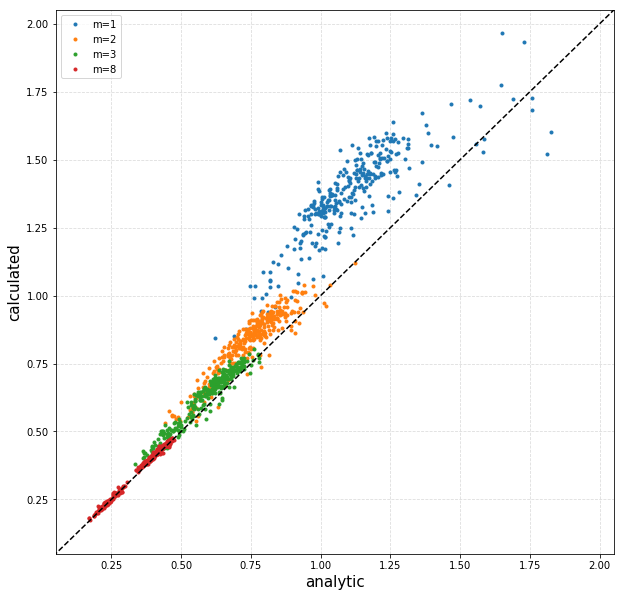

In [530]:
plt.figure(figsize=(10,10))
plt.plot(ba1_ana_deg, ba1_cal_deg, marker='.', linestyle='', label='m=1')
plt.plot(ba2_ana_deg, ba2_cal_deg, marker='.', linestyle='', label='m=2')
plt.plot(ba3_ana_deg, ba3_cal_deg, marker='.', linestyle='', label='m=3')
plt.plot(ba8_ana_deg, ba8_cal_deg, marker='.', linestyle='', label='m=8')
plt.plot([0,5],[0,5],linestyle='--', color='k')
plt.xlim(0.05, 2.05)
plt.ylim(0.05, 2.05)
plt.xlabel('analytic', size=15)
plt.ylabel('calculated', size=15)
plt.grid(color='gainsboro', linestyle='--')
plt.legend()
plt.show()

In [484]:
np.log2(N)+np.log2(k_std/(k_avg*k_avg))
# sum(np.log2(np.array(list(nx.average_neighbor_degree(G, source='in', target='out').values()))/k_avg/k_avg))

# /np.log2(N)

8.352095376157905

In [438]:
N*k_avg

3992.0

In [492]:
k_iin = np.array(list(dict(G.in_degree()).values()))
k_jin = 1/np.array(list(nx.average_neighbor_degree(G, source='in', target='out').values()))
W_ins = k_iin*k_jin
wins = np.nan_to_num(W_ins)/np.sum(np.nan_to_num(W_ins))
print(get_determinism_analytic(G,p0), np.log2(N) - sp.stats.entropy(wins, base=2))
print(get_determinism(G, p0),get_degeneracy(G, p0))

8.358196268933774 0.843351674278173
8.358196268933781 0.9750779814273489


In [390]:
p0=0
det1 = np.log2(N/k_avg)
det2 = np.mean([np.log2(N/i) for i in list(dict(G.out_degree()).values()) if i>0]) ############
deg1 = np.log2(k_std/(k_avg**2))
deg2 = np.log2(k_jin/k_avg)
print("Det1 = %.4f, Deg1 = %.4f, EI_11 = %.4f" % (det1, deg1, det1+deg1))
print("Det2 = %.4f, Deg1 = %.4f, EI_21 = %.4f" % (det2, deg1, det2+deg1))
print("Det1 = %.4f, Deg2 = %.4f, EI_12 = %.4f" % (det1, deg2, det1-deg2))
print("DetE = %.4f, DegE = %.4f, EI_ei = %.4f" % (get_determinism(G, p0), get_degeneracy(G, p0), get_ei(G, p0)))

Det1 = 8.9457, Deg1 = -1.5676, EI_11 = 7.3781
Det2 = 8.9497, Deg1 = -1.5676, EI_21 = 7.3821


TypeError: only size-1 arrays can be converted to Python scalars

In [603]:
%%timeit 
get_degeneracy(G, p0)

49.6 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [604]:
%%timeit 
get_determinism(G, p0)

64.8 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [605]:
%%timeit 
get_determinism_analytic(G, p0=0)

21.5 ms ± 500 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [606]:
get_determinism_analytic(G, p0=0)

6.252739448322958

In [607]:
get_determinism(G,p0=0)

6.252739448322976

In [13]:
np.std(list(dict(nx.degree(G)).values()))

5.190562204617145

In [14]:
np.mean(list(dict(nx.degree(G)).values()))

3.992

In [ ]:
np.log2()